# Importing libraries and dataset 

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load dataset (Pandas)
data = pd.read_csv('./medals.csv')

In [3]:
data.isnull().sum()

discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
dtype: int64

In [100]:
data.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SWE


In [112]:
data.columns

Index(['discipline_title', 'slug_game', 'event_title', 'event_gender',
       'medal_type', 'participant_type', 'participant_title', 'athlete_url',
       'athlete_full_name', 'country_name', 'country_3_letter_code'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [10]:
#duplicating country_3_letter_code
data.drop('country_code',axis=1,inplace=True)

In [11]:
data.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SWE


<Axes: xlabel='medal_type', ylabel='count'>

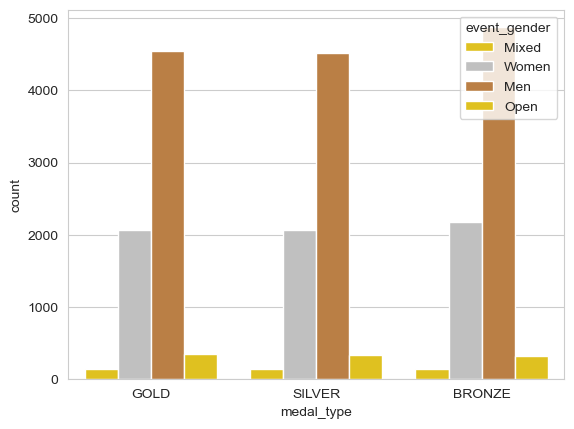

In [192]:
sns.countplot(x='medal_type',data=data,palette=["#FFD700","#C0C0C0","#CD7F32"],hue='event_gender')

<Axes: xlabel='participant_type', ylabel='count'>

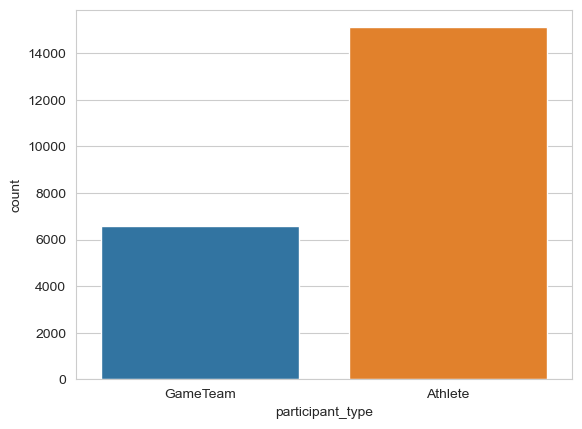

In [193]:
sns.countplot(x='participant_type',data=data)

Top 5 medal winners: 


Text(0, 0.5, 'Medal Count')

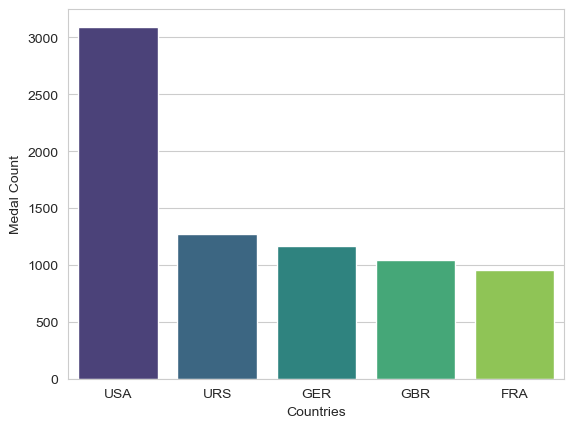

In [194]:
country_with_medals=data.groupby('country_3_letter_code')['medal_type'].count().sort_values(ascending=False)
print("Top 5 medal winners: ")
country_with_medals=country_with_medals.head(5).reset_index()
sns.barplot(x='country_3_letter_code',y='medal_type',data=country_with_medals,palette='viridis')
plt.xlabel('Countries')
plt.ylabel('Medal Count')

In [103]:
country_with_gold=data[data['medal_type']=='GOLD'].groupby('country_name')['medal_type'].count()
print("Most gold medals: ",country_with_gold.idxmax()," => ",country_with_gold[country_with_gold.idxmax()])

Most gold medals:  United States of America  =>  1222


In [48]:
data['event_gender'].unique()

array(['Mixed', 'Women', 'Men', 'Open'], dtype=object)

<Axes: xlabel='event_gender', ylabel='count'>

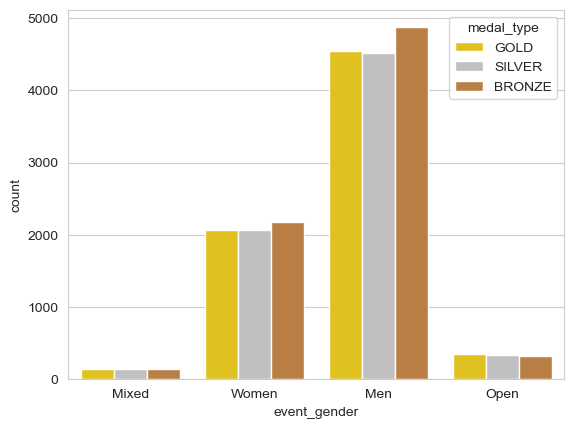

In [195]:
sns.countplot(x='event_gender',data=data,hue='medal_type',palette=["#FFD700","#C0C0C0","#CD7F32"])

In [179]:
data['year']=data['slug_game'].apply(lambda x:x.split('-')[-1])

In [199]:
data['year'].unique()

array(['2022', '2020', '2018', '2016', '2014', '2012', '2010', '2008',
       '2006', '2004', '2002', '2000', '1998', '1996', '1994', '1992',
       '1988', '1984', '1980', '1976', '1972', '1968', '1964', '1960',
       '1956', '1952', '1948', '1936', '1932', '1928', '1924', '1920',
       '1912', '1908', '1904', '1900', '1896'], dtype=object)

Text(0.5, 1.0, 'Participation of countries throughtout the years')

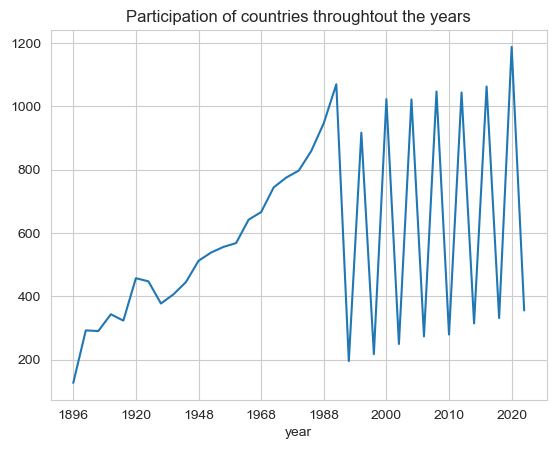

In [197]:
data.groupby('year').count()['country_3_letter_code'].plot()
plt.title('Participation of countries throughtout the years')

In [208]:
data['athlete_full_name'].isnull().sum()

3624

In [210]:
data['athlete_url'].isnull().sum()

4670

<Axes: >

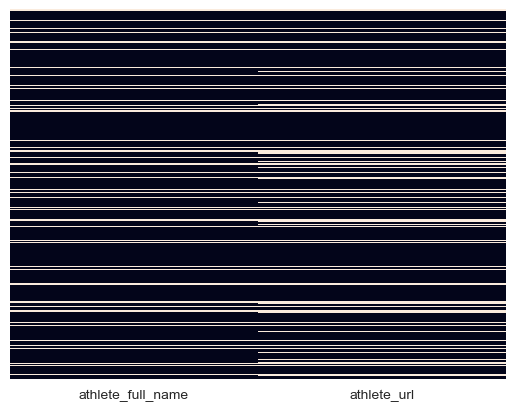

In [212]:
sns.heatmap(data[['athlete_full_name','athlete_url']].isnull(),yticklabels=False,cbar=False)

In [219]:
def get_names_from_url(cols):
    full_name = cols[0]
    url = cols[1]
    if pd.isnull(full_name) and not pd.isnull(url):
        names=url.split('/')[-1].split('-')
        return ' '.join(names)

In [216]:
data['athlete_full_name']=data[['athlete_full_name','athlete_url']].apply(get_names_from_url,axis=1)

<Axes: >

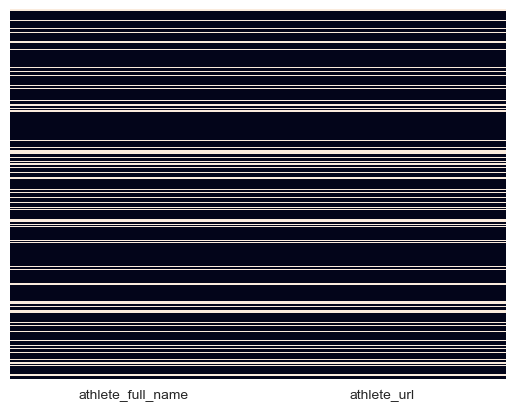

In [217]:
sns.heatmap(data[['athlete_full_name','athlete_url']].isnull(),yticklabels=False,cbar=False)

In [218]:
data['athlete_full_name'].unique()

array(['stefania constantini', 'amos mosaner', 'kristin skaslien', ...,
       'george stuart robertson', 'georgios tsitas',
       'launceston elliot 1'], dtype=object)

In [223]:
data.head(100)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_3_letter_code,year
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,stefania constantini,Italy,ITA,2022
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,amos mosaner,Italy,ITA,2022
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,kristin skaslien,Norway,NOR,2022
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,magnus nedregotten,Norway,NOR,2022
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,almida de val,Sweden,SWE,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Snowboard,beijing-2022,Women's Snowboard Big Air,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/anna-gasser,anna gasser,Austria,AUT,2022
96,Snowboard,beijing-2022,Men's Snowboard Cross,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/omar-visintin,omar visintin,Italy,ITA,2022
97,Snowboard,beijing-2022,Men's Snowboard Cross,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/eliot-grondin,eliot grondin,Canada,CAN,2022
98,Snowboard,beijing-2022,Men's Snowboard Cross,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/alessandro-ha...,alessandro haemmerle,Austria,AUT,2022
